### Perform Hierarchical Clustering

Visualise which stations cluster together based on their venue types.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # normalize dataset

import scipy # scipy clustering
import pylab # scipy clustering
from scipy.cluster import hierarchy # scipy clustering
from scipy.cluster.hierarchy import fcluster

from scipy.spatial import distance_matrix # SCIKIT cluster

import matplotlib.cm as cm # SCITKIT visualize

from scipy import ndimage



from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs




print('Libraries imported.')

Libraries imported.


### Load Dataset

In [2]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts.csv')
print(Stations_VenueCounts.head())

      Station  Arts & Entertainment  College & University  Food  \
0       Blair                     1                     1    26   
1    Cyrville                     2                     0     8   
2  St-Laurent                     3                     1    35   
3    Tremblay                     2                     1    16   
4     Hurdman                     2                    11    15   

   Nightlife Spot  Outdoors & Recreation  Professional & Other Places  \
0               1                      4                           20   
1               2                      2                           30   
2               0                      1                            7   
3               0                      4                           13   
4               3                     14                           16   

   Residence  Shop & Service  Travel & Transport  
0          0              35                  10  
1          2              35                  11  
2    

### Choose Feature Set

In [3]:
featureset = Stations_VenueCounts[['Arts & Entertainment'
                                   , 'College & University'
                                   , 'Food'
                                   , 'Nightlife Spot'
                                   , 'Outdoors & Recreation'
                                   , 'Professional & Other Places'
                                   , 'Residence'
                                   , 'Shop & Service'
                                   , 'Travel & Transport'
                                  ]]
featureset.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,1,1,26,1,4,20,0,35,10
1,2,0,8,2,2,30,2,35,11
2,3,1,35,0,1,7,0,133,1
3,2,1,16,0,4,13,0,20,24
4,2,11,15,3,14,16,14,15,26


### Data Transformation


Convert to percentage of row total

In [11]:
data_000 = featureset

data_001 = data_000.div(data_000.sum(1), 0).round(2)
data_002 = data_001*100

data_002.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,1.0,1.0,27.0,1.0,4.0,20.0,0.0,36.0,10.0
1,2.0,0.0,9.0,2.0,2.0,33.0,2.0,38.0,12.0
2,2.0,1.0,19.0,0.0,1.0,4.0,0.0,73.0,1.0
3,2.0,1.0,20.0,0.0,5.0,16.0,0.0,25.0,30.0
4,2.0,9.0,13.0,3.0,12.0,14.0,12.0,13.0,22.0


Normalize

In [5]:
data_002 = data_001.values # returns a numpy array

min_max_scaler = MinMaxScaler()
data_003 = min_max_scaler.fit_transform(data_002)

data_003[0:5]

array([[0.        , 0.01587302, 0.79166667, 0.16666667, 0.11111111,
        0.34782609, 0.        , 0.44776119, 0.28125   ],
       [0.04347826, 0.        , 0.04166667, 0.33333333, 0.03703704,
        0.63043478, 0.16666667, 0.47761194, 0.34375   ],
       [0.04347826, 0.01587302, 0.45833333, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.04347826, 0.01587302, 0.5       , 0.        , 0.14814815,
        0.26086957, 0.        , 0.28358209, 0.90625   ],
       [0.04347826, 0.14285714, 0.20833333, 0.5       , 0.40740741,
        0.2173913 , 1.        , 0.10447761, 0.65625   ]])

### Hierarchical Cluster Analysis

Distance Matrix

In [6]:
dist_matrix = distance_matrix(data_003, data_003)
print(dist_matrix)

[[0.         0.84282254 0.81128119 0.73569731 1.35376422 1.10283984
  1.42516781 1.33300178 0.91222305 0.95702411 1.09829907 0.88178518
  1.15203503 0.68101458 0.57115474 0.59832394 0.90840927 0.93398042
  0.87150973 1.03057642 0.8108061  0.76326006 1.42128138 1.10631171
  1.04082782 0.78241724]
 [0.84282254 0.         1.05005955 0.92314043 1.14676622 0.98232468
  1.26529232 1.3225646  0.54577552 1.01708315 0.83758527 0.51859502
  1.15665011 0.7830792  1.10930475 0.67975922 0.6039191  1.12784751
  0.73881515 0.84217534 0.87142645 0.78707247 1.20900689 0.74180646
  0.83788439 0.64116871]
 [0.81128119 1.05005955 0.         1.1942699  1.66567979 1.48759689
  1.58149008 1.57273647 1.44189796 1.28907267 1.38226267 1.23345938
  1.41709435 1.10627652 1.14223087 0.67841173 1.39548787 1.5440521
  1.43532903 1.56747549 1.34184412 1.31123908 1.60603572 1.44692053
  1.51931007 1.27467199]
 [0.73569731 0.92314043 1.1942699  0.         1.23080403 1.07734156
  1.51905239 1.56001944 0.92697766 1.07438

Clustering

In [7]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\DataScience\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Visualization

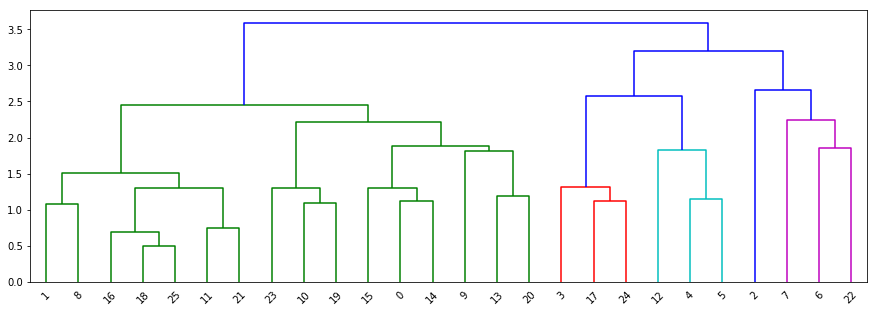

In [11]:
fig = pylab.figure(figsize=(15,5))

dendro = hierarchy.dendrogram(Z)

_Based on the above figure the majority of stations cluster at distances <1.5. This level would result in five clusters with only one member. Increasing the cut-off to 2.0 reduces the number of clusters with only one member to two. Thus we have selected 8 clusters for the final result._

Generate Cluster Labels

In [12]:
agglom = AgglomerativeClustering(n_clusters = 8, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

C:\DataScience\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 5, 7, 4, 1, 1, 2, 6, 5, 0, 3, 5, 1, 0, 0, 0, 5, 4, 5, 3, 0, 5,
       2, 3, 4, 5], dtype=int64)

Add Cluster To Each Row

In [27]:
results_001 = data_001

results_001['Cluster']=agglom.labels_
results_001.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station
0,0.01,0.01,0.27,0.01,0.04,0.20,0.00,0.36,0.10,0,Blair
1,0.02,0.00,0.09,0.02,0.02,0.33,0.02,0.38,0.12,5,Cyrville
2,0.02,0.01,0.19,0.00,0.01,0.04,0.00,0.73,0.01,7,St-Laurent
3,0.02,0.01,0.20,0.00,0.05,0.16,0.00,0.25,0.30,4,Tremblay
4,0.02,0.09,0.13,0.03,0.12,0.14,0.12,0.13,0.22,1,Hurdman


Add Station Name

In [28]:
results_001['Station'] = Stations_VenueCounts['Station']

Add City

In [29]:
#results_001['Station']

City = ['Ottawa', 'Ottawa', 'Ottawa', 
        'Ottawa', 'Ottawa', 'Ottawa',
        'Ottawa', 'Ottawa', 'Ottawa', 
        'Ottawa', 'Ottawa',
        'Toronto', 'Toronto', 'Toronto',
        'Toronto', 'Toronto', 'Toronto',
        'Toronto', 'Toronto', 'Toronto',
        'Toronto', 'Toronto', 'Toronto',
        'Toronto', 'Toronto',
        'Ottawa']

results_001['City'] = City

results_001.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,City
0,0.01,0.01,0.27,0.01,0.04,0.20,0.00,0.36,0.10,0,Blair,Ottawa
1,0.02,0.00,0.09,0.02,0.02,0.33,0.02,0.38,0.12,5,Cyrville,Ottawa
2,0.02,0.01,0.19,0.00,0.01,0.04,0.00,0.73,0.01,7,St-Laurent,Ottawa
3,0.02,0.01,0.20,0.00,0.05,0.16,0.00,0.25,0.30,4,Tremblay,Ottawa
4,0.02,0.09,0.13,0.03,0.12,0.14,0.12,0.13,0.22,1,Hurdman,Ottawa


Reorder Columns

In [30]:
results_001 = results_001[[
    'Station',
    'City',
    'Cluster',
    'Arts & Entertainment',
    'College & University',
    'Food',
    'Nightlife Spot',
    'Outdoors & Recreation',
    'Professional & Other Places',
    'Residence',
    'Shop & Service',
    'Travel & Transport'
]]

results_001.head()

,Station,City,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Blair,Ottawa,0,0.01,0.01,0.27,0.01,0.04,0.20,0.00,0.36,0.10
1,Cyrville,Ottawa,5,0.02,0.00,0.09,0.02,0.02,0.33,0.02,0.38,0.12
2,St-Laurent,Ottawa,7,0.02,0.01,0.19,0.00,0.01,0.04,0.00,0.73,0.01
3,Tremblay,Ottawa,4,0.02,0.01,0.20,0.00,0.05,0.16,0.00,0.25,0.30
4,Hurdman,Ottawa,1,0.02,0.09,0.13,0.03,0.12,0.14,0.12,0.13,0.22


Examine Members of Each Cluster

In [17]:
results_001.loc[data_001['Cluster'] == 0]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Blair,0,0.01,0.01,0.27,0.01,0.04,0.20,0.00,0.36,0.10
9,Pimisi,0,0.14,0.01,0.20,0.01,0.12,0.18,0.07,0.17,0.09
13,College,0,0.04,0.02,0.23,0.02,0.04,0.26,0.07,0.27,0.06
14,Dundas,0,0.08,0.03,0.32,0.03,0.05,0.22,0.00,0.25,0.03
15,Queen,0,0.05,0.00,0.19,0.03,0.02,0.16,0.01,0.51,0.04
20,St-Patrick,0,0.02,0.03,0.24,0.01,0.02,0.43,0.06,0.15,0.04


In [18]:
results_001.loc[data_001['Cluster'] == 1]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
4,Hurdman,1,0.02,0.09,0.13,0.03,0.12,0.14,0.12,0.13,0.22
5,Lees,1,0.03,0.14,0.16,0.03,0.12,0.16,0.09,0.11,0.17
12,Wellesley,1,0.03,0.01,0.23,0.06,0.03,0.14,0.09,0.34,0.06


In [19]:
results_001.loc[data_001['Cluster'] == 2]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
6,uOttawa,2,0.01,0.63,0.08,0.03,0.05,0.10,0.02,0.06,0.03
22,Museum,2,0.24,0.23,0.09,0.03,0.07,0.22,0.00,0.09,0.03


In [20]:
results_001.loc[data_001['Cluster'] == 3]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
10,Bayview,3,0.06,0.01,0.15,0.06,0.06,0.25,0.05,0.30,0.06
19,Osgoode,3,0.06,0.01,0.18,0.05,0.09,0.35,0.04,0.09,0.14
23,St-George,3,0.10,0.20,0.11,0.04,0.04,0.32,0.03,0.11,0.06


In [21]:
results_001.loc[data_001['Cluster'] == 4]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
3,Tremblay,4,0.02,0.01,0.20,0.00,0.05,0.16,0.00,0.25,0.30
17,Union,4,0.04,0.00,0.26,0.04,0.01,0.19,0.00,0.13,0.32
24,Spadina,4,0.02,0.07,0.14,0.03,0.03,0.23,0.02,0.13,0.33


In [22]:
results_001.loc[data_001['Cluster'] == 5]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
1,Cyrville,5,0.02,0.00,0.09,0.02,0.02,0.33,0.02,0.38,0.12
8,Lyon,5,0.01,0.02,0.14,0.02,0.04,0.46,0.02,0.12,0.16
11,Bloor-Yonge,5,0.01,0.03,0.13,0.01,0.03,0.48,0.01,0.26,0.04
16,King,5,0.02,0.01,0.16,0.04,0.04,0.45,0.01,0.20,0.08
18,St-Andrew,5,0.02,0.02,0.20,0.03,0.02,0.50,0.01,0.14,0.06
21,Queen's Park,5,0.02,0.11,0.21,0.01,0.02,0.47,0.00,0.14,0.04
25,Parliament,5,0.02,0.00,0.19,0.03,0.04,0.45,0.01,0.23,0.03


In [23]:
results_001.loc[data_001['Cluster'] == 6]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
7,Rideau,6,0.02,0.01,0.16,0.06,0.28,0.12,0.01,0.3,0.04


In [24]:
results_001.loc[data_001['Cluster'] == 7]

,Station,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
2,St-Laurent,7,0.02,0.01,0.19,0.0,0.01,0.04,0.0,0.73,0.01


Output the File

In [32]:
results_001.to_csv('Stations_VenueCounts_Clustered.csv', index = False)